<a href="https://colab.research.google.com/github/pachterlab/MBP_2023/blob/main/OAS1_isof_expression_all_organs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

sns.set_context("poster")

In [ ]:
# Dictionary from transcript id to isoform common name

id_to_name = {'ENST00000445409.6': 'p48',
 'ENST00000452357.6': 'p42',
 'ENST00000202917.10': 'p46',
 'ENST00000551241.5': 'p44b',
}

In [ ]:
# Read dataframe 
df = pd.read_csv('../files/oas1_isoform_expression.csv.gz')

<ipython-input-18-56b7550dd2c6>:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../files/expression.csv')


In [ ]:
# Replace transcript id by common name
df['target_name'] = [id_to_name[id] for id in df['target_id']]

# Create unique cell id
df['cell_id'] = [f"{obs_id}_{bc}" for obs_id, bc in zip(df['observation_id'], df['barcode'])]

# Annotate testis cells
df['is_testis']  = ['testis' if v =='testis' else 'other' for v in df.organ]

In [ ]:
# Calculate relative isoform proportion

# Calculate sum expression of all isoforms
isoform_expression_sum = df.groupby('cell_id').sum()['expression'].to_frame()
isoform_expression_sum.columns = ['all_isoforms_expression']
isoform_expression_sum.head(n=3)

<ipython-input-20-5a3eaf16282a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  isoform_expression_sum = df.groupby('cell_id').sum()['expression'].to_frame()


,all_isoforms_expression
cell_id,
CRX102285_AAACCTGAGAGTACCG,0.0
CRX102285_AAACCTGAGTACGACG,0.0
CRX102285_AAACCTGAGTCCATAC,0.0


In [ ]:
## Merge with df
df_sum = df.merge(isoform_expression_sum, left_on = 'cell_id', right_on = 'cell_id')

# Calculate percentages
df_sum['isof_percentage'] = df_sum['expression'] / df_sum['all_isoforms_expression'] * 100

# Remove Nans
df_sum = df_sum[~df_sum['isof_percentage'].isna()]

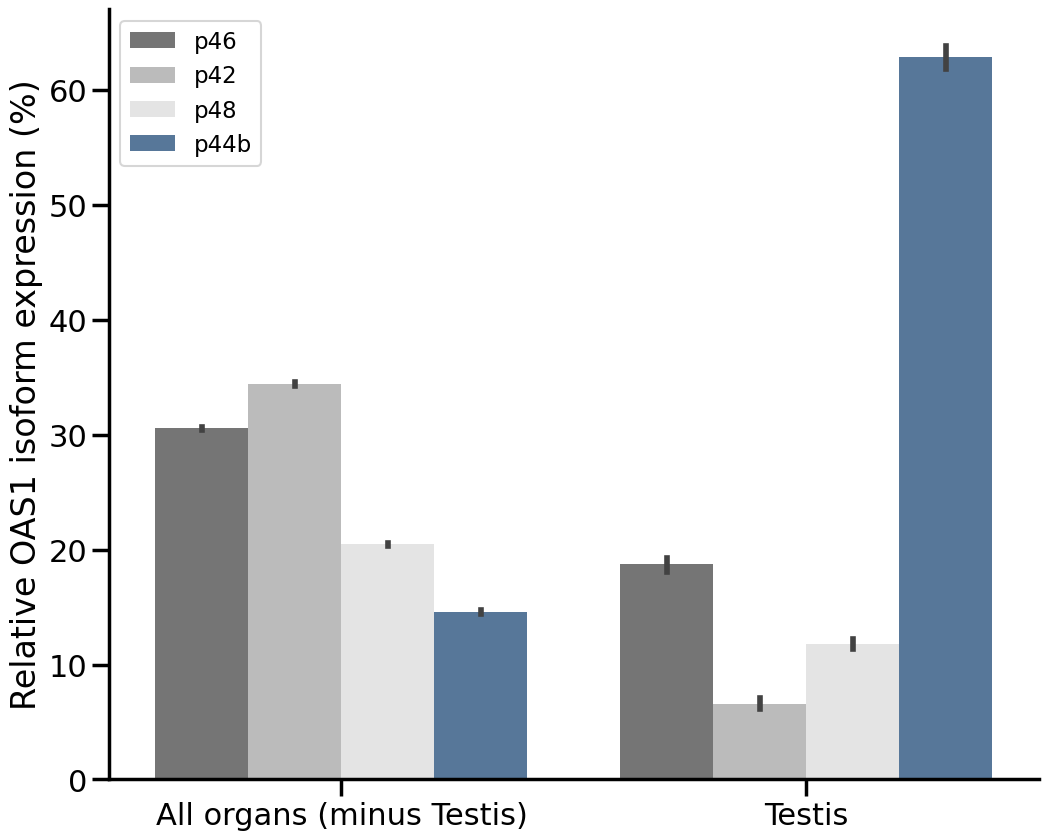

In [ ]:
toplot_df = df_sum
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(12,10))
sns.set_context('talk')
f = sns.barplot(data = toplot_df,x = 'is_testis', y = 'isof_percentage', hue = 'target_name', order = ['other', 'testis'],
                palette = ['#757575', '#BBBBBB', '#E4E4E4', '#4C77A4'], hue_order = ['p46', 'p42', 'p48', 'p44b'],
               linewidth=10)
f.set_xlabel("")
f.set_ylabel('Relative OAS1 isoform expression (%)')
ax.set_xticklabels(['All organs (minus Testis)', 'Testis'])
plt.xticks()
f.legend_.set_title(None)
sns.despine()
!mkdir -p figures
plt.savefig('figures/fig_2d.png')